As we know, the police kill too many people. As the Washington Post points out, this number has not been going down:
> Despite the unpredictable events that lead to fatal shootings, police nationwide have shot and killed almost the same number of people annually — nearly 1,000 — since The Post began its project. Probability theory may offer an explanation. It holds that the quantity of rare events in huge populations tends to remain stable absent major societal changes, such as a fundamental shift in police culture or extreme restrictions on gun ownership.[^1]

[^1]: Source: https://www.washingtonpost.com/graphics/investigations/police-shootings-database/


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates
import altair as alt


# importing washington post database from here: https://github.com/washingtonpost/data-police-shootings
df = pd.read_csv(
    "https://raw.githubusercontent.com/washingtonpost/data-police-shootings/master/fatal-police-shootings-data.csv",
    parse_dates=["date"],
    index_col="date",
)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7802 entries, 2015-01-02 to 2022-10-04
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7802 non-null   int64  
 1   name                     7377 non-null   object 
 2   manner_of_death          7802 non-null   object 
 3   armed                    7593 non-null   object 
 4   age                      7316 non-null   float64
 5   gender                   7781 non-null   object 
 6   race                     6293 non-null   object 
 7   city                     7802 non-null   object 
 8   state                    7802 non-null   object 
 9   signs_of_mental_illness  7802 non-null   bool   
 10  threat_level             7802 non-null   object 
 11  flee                     6903 non-null   object 
 12  body_camera              7802 non-null   bool   
 13  longitude                6963 non-null   float64
 14  latitu

# recreating WaPo graphics

## Rate of shootings remains steady
1. plot one year of shootings as cumulativ

<AxesSubplot:>

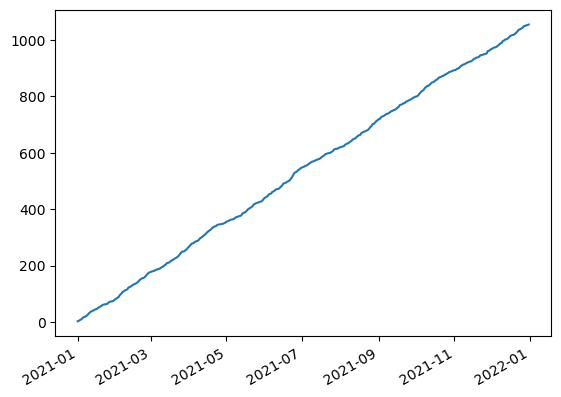

In [68]:
year2021 = df[df.index.year==2021]
year_count = year2021.index.value_counts().sort_index()
year_count.cumsum().plot()

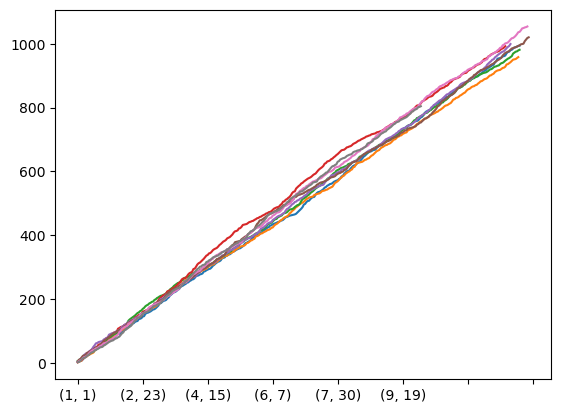

In [37]:
# here are all the years stacked on top of each other but the problem is I lost the granularity by day
for year in df.index.year.unique():
    df_year = df[df.index.year==year]
    year_count = df_year.index.value_counts().sort_index()
    year_count.index = ([year_count.index.to_series().dt.month, year_count.index.to_series().dt.day])
    year_count.cumsum().plot()

In [ ]:
# multiline tooltip
# from https://altair-viz.github.io/gallery/multiline_tooltip.html

# Create a selection that chooses the nearest point & selects based on x-value
# it wasn't on the line because it was doing interpolate basis which draws a nice curvy polynomial line between the points
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['date'], empty='none')

# The basic line
line = alt.Chart(kyearly).mark_line().encode(
    x='date:O',
    y='Number Killed:Q',
    color='race:N',
    # tooltip=['Number Killed', 'race']
)

# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart(kyearly).mark_point().encode(
    x='date:O',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'Number Killed:Q', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart(kyearly).mark_rule(color='gray').encode(
    x='date:O',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(
    line, selectors, points, text, rules
).properties(
    width=400, height=300
)




<AxesSubplot:>

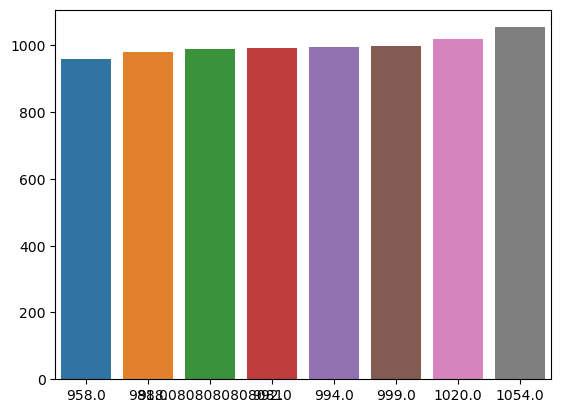

In [75]:
killings_yearly = df.groupby(df.index.year).size()
killings_yearly

# account for 2022 being not done 
from datetime import date

percent_2022 = (date.today() - date(2022, 1, 1)).days/365
killings_yearly[2022] = killings_yearly[2022] / percent_2022

#plot
sns.barplot(
    data=killings_yearly,
    x=killings_yearly.index, y=killings_yearly
    )


<AxesSubplot:xlabel='date'>

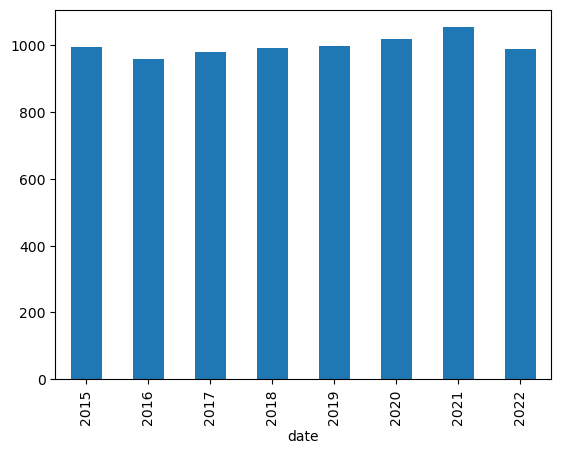

In [76]:
# in plt
killings_yearly.plot(kind="bar")


date
2015     994
2016     958
2017     981
2018     992
2019     999
2020    1020
2021    1054
2022      10
dtype: int64